# **Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
#for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mso
#for machine learning - preprocessing and model selection,
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, RepeatedKFold, StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
# Modelling Libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# Evaluation metrics - bu kısımda ekleme yapılabilir duruma göre
from sklearn.metrics import confusion_matrix,precision_score,accuracy_score, recall_score, f1_score, roc_curve

# **Read data**

In [ ]:
water_df=pd.read_csv("water_potability.csv")
water_df.head(6)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0


# **Examining Data**

In [ ]:
water_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
water_df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
water_df.isin(['?']).sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [ ]:
water_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3271    False
3272    False
3273    False
3274    False
3275    False
Length: 3276, dtype: bool

In [ ]:
water_df.duplicated().sum()

0

"ph", "Sulfate" ve "Trihalomethanes" sütunlarında boş verileri doldurmamız gerekir.

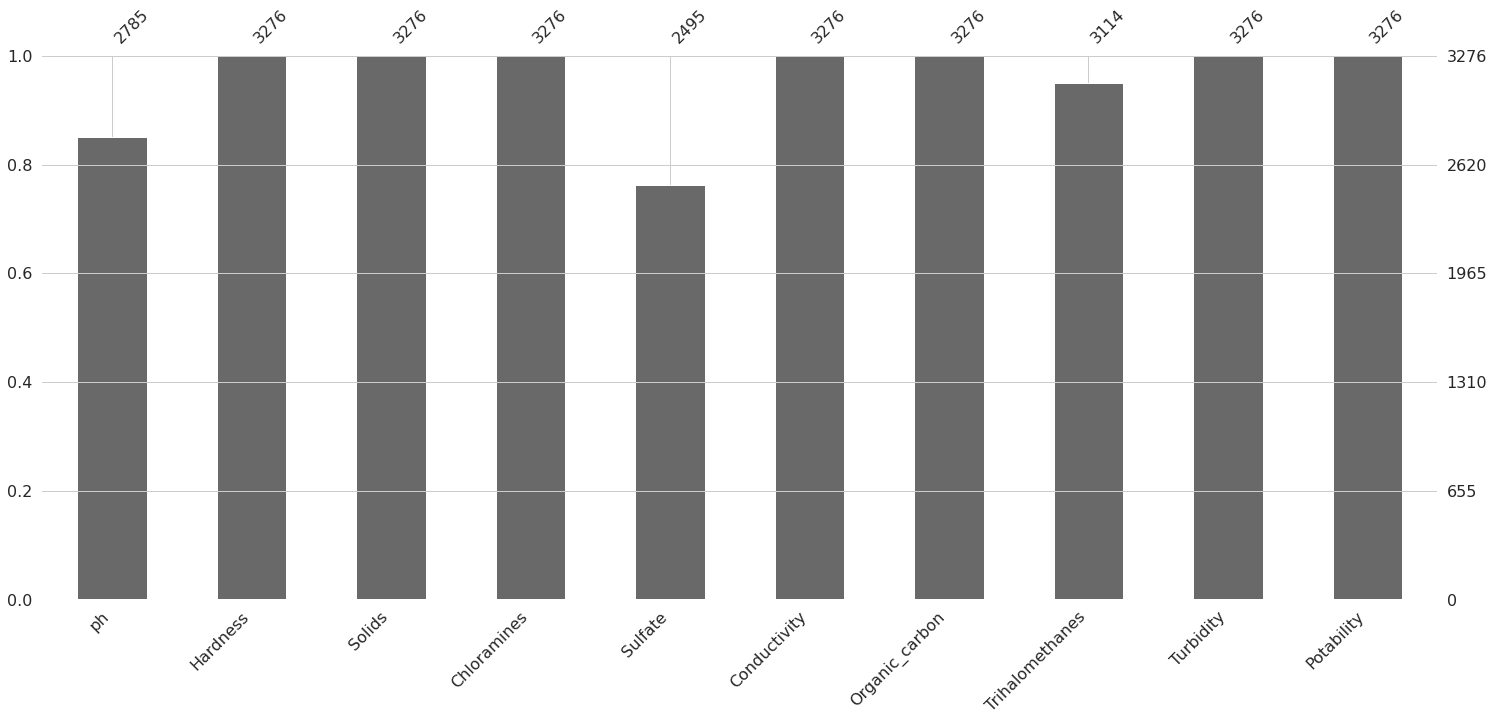

In [ ]:
mso.bar(water_df)

In [ ]:
water_df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


# **Exploratory Data Analysis (EDA)**

In [ ]:
"""! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip """

'! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip '

In [ ]:
"""from pandas_profiling import ProfileReport
prof = ProfileReport(water_df)
prof
prof.to_file('profile_report.html')"""

"from pandas_profiling import ProfileReport\nprof = ProfileReport(water_df)\nprof\nprof.to_file('profile_report.html')"

# **Visualizations**

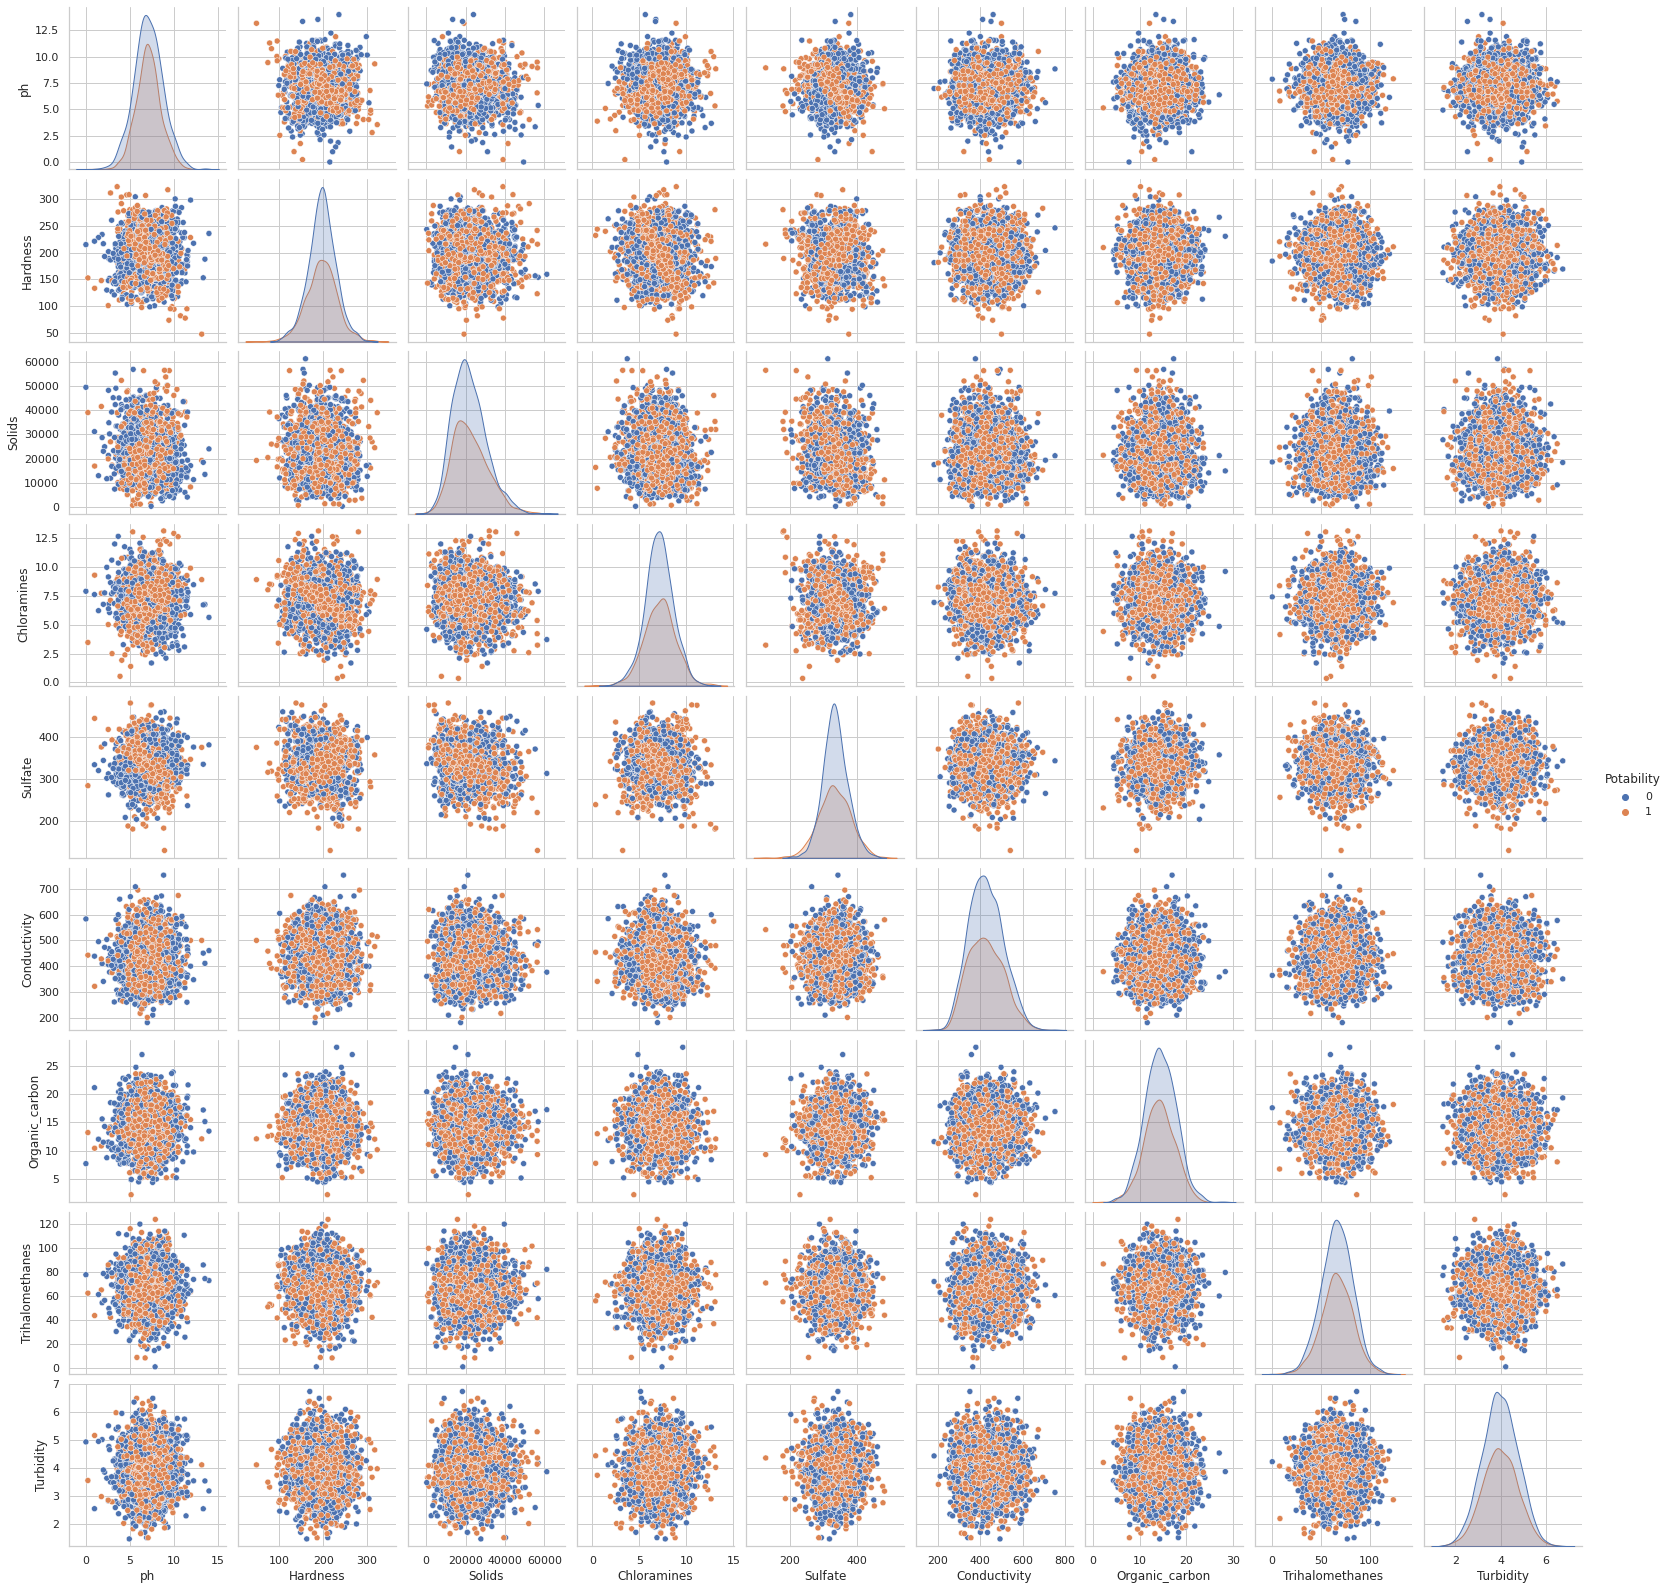

In [ ]:
#veri kümsesindeki ikili ilişkiler incelendi
sns.pairplot(water_df, hue="Potability")

**Kaç adet örneklem içme suyu olarak uygundur?**

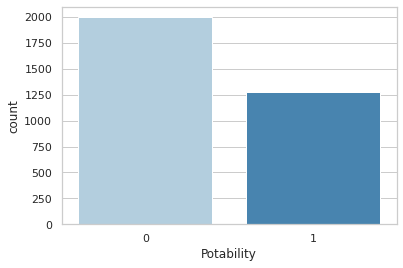

In [ ]:
sns.countplot(x=water_df["Potability"],palette="Blues")

0    1998
1    1278
Name: Potability, dtype: int64


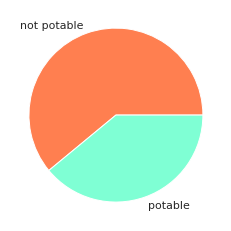

In [ ]:
labels=["not potable", "potable"]
x=water_df.Potability.value_counts()
print(x)
plt.pie(x=x,labels=labels, colors=["coral","aquamarine"])
plt.show()

**Özniteliklere ait histogram ve kutu grafikleri**

> Veri setinin nasıl bir dağılıma sahip olduğunu anlamak için görselleştirmeler



/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


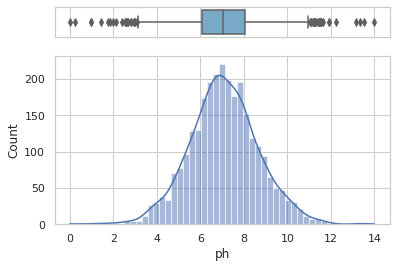

In [ ]:
#ph
sns.set(style="whitegrid")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(water_df["ph"], ax=ax_box, palette="Blues")
sns.histplot(data=water_df, x="ph", ax=ax_hist, kde=True, palette="Blues")
ax_box.set(xlabel='')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


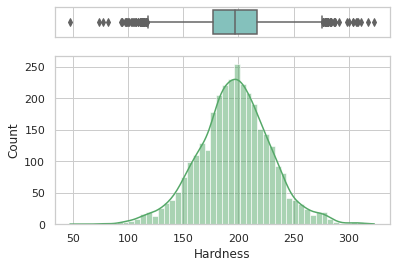

In [ ]:
#hardness
sns.set(style="whitegrid")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(water_df["Hardness"], ax=ax_box, palette="GnBu")
sns.histplot(data=water_df, x="Hardness", ax=ax_hist, kde=True, color="g")
ax_box.set(xlabel='')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


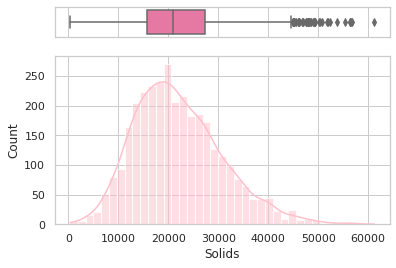

In [ ]:
#solids
sns.set(style="whitegrid")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(water_df["Solids"], ax=ax_box, palette="RdPu")
sns.histplot(data=water_df, x="Solids", ax=ax_hist, kde=True, color="pink")
ax_box.set(xlabel='')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


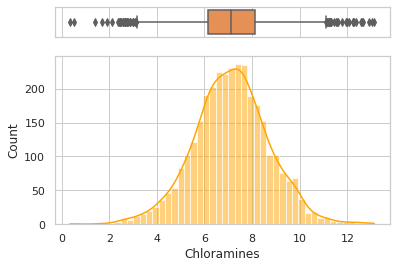

In [ ]:
#Chloramines
sns.set(style="whitegrid")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(water_df["Chloramines"], ax=ax_box, palette="Oranges")
sns.histplot(data=water_df, x="Chloramines", ax=ax_hist, kde=True, color="orange")
ax_box.set(xlabel='')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


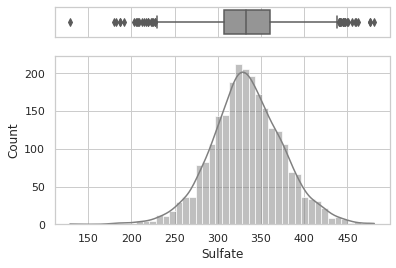

In [ ]:
#Sulfate
sns.set(style="whitegrid")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(water_df["Sulfate"], ax=ax_box, palette="Greys")
sns.histplot(data=water_df, x="Sulfate", ax=ax_hist, kde=True, color="gray")
ax_box.set(xlabel='')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


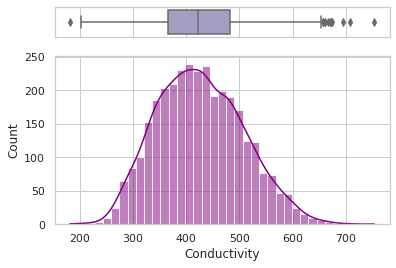

In [ ]:
#Conductivity
sns.set(style="whitegrid")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(water_df["Conductivity"], ax=ax_box, palette="Purples")
sns.histplot(data=water_df, x="Conductivity", ax=ax_hist, kde=True, color="purple")
ax_box.set(xlabel='')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


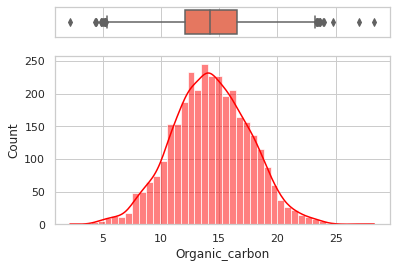

In [ ]:
#Organic_carbon
sns.set(style="whitegrid")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(water_df["Organic_carbon"], ax=ax_box, palette="Reds")
sns.histplot(data=water_df, x="Organic_carbon", ax=ax_hist, kde=True, color="red")
ax_box.set(xlabel='')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


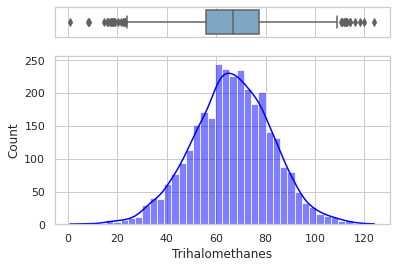

In [ ]:
#Trihalomethanes
sns.set(style="whitegrid")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(water_df["Trihalomethanes"], ax=ax_box, palette="PuBu")
sns.histplot(data=water_df, x="Trihalomethanes", ax=ax_hist, kde=True, color="blue")
ax_box.set(xlabel='')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


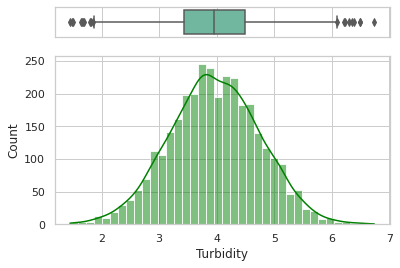

In [ ]:
#Turbidity
sns.set(style="whitegrid")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(water_df["Turbidity"], ax=ax_box, palette="BuGn")
sns.histplot(data=water_df, x="Turbidity", ax=ax_hist, kde=True, color="green")
ax_box.set(xlabel='')
plt.show()

# **Korelasyon Matrisi**

In [ ]:
corr = water_df.corr()
corr

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


(10.5, -0.5)

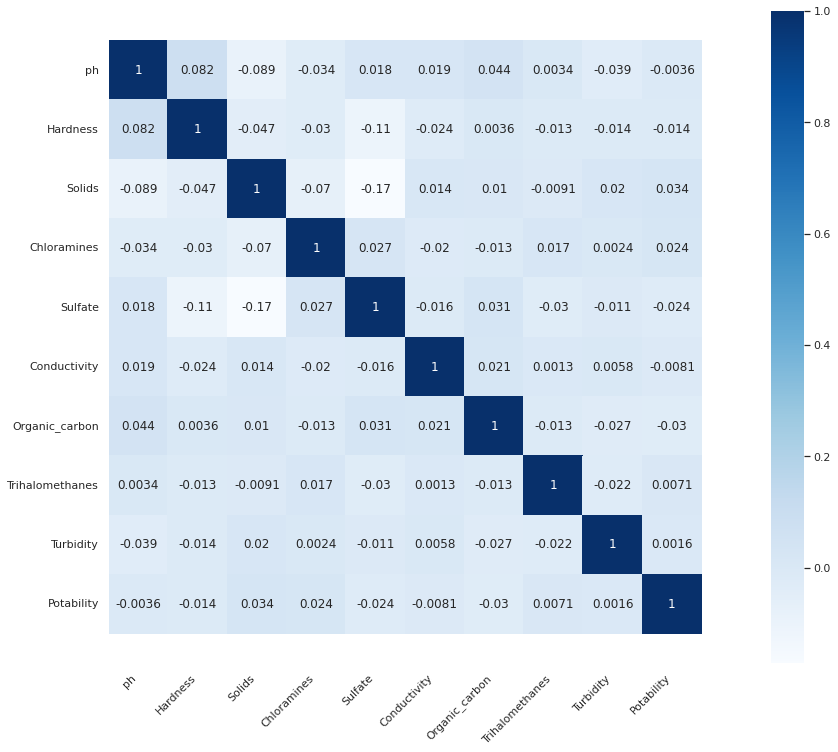

In [ ]:
plt.figure(figsize=(25,12))
ax= sns.heatmap(corr,cmap="Blues", square=True, annot=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_ylim(len(corr)+0.5, -0.5)

Özellikler arasında yüksek korelasyon durumu söz konusu değildir. Dolayısıyla herhangi bir feature engineering çalışması yapmamıza gerek yok denebilir.

# **Handling With Missing Values**



"ph", "Sulfate" ve "Trihalomethanes" sütunlarında boş verileri doldurmamız gerektiğini yukardaki incelemelerimizde belirtmiştik. Suyun içilebilir olup olmadığına dair yapılan sınıflandırmada içilebilir ve içilemez durumlarına ait "ph", "Sulfate" ve "Trihalomethanes" değerlerini inceleyip boş verileri neye göre doldurmamız gerektiğine karar vermemiz gerekir.

Suyun içilemez olduğu durumdaki "ph","Sulfate" ve "Trihalomethanes" özelliklerinin ortalama değerleri aşağıdaki gibidir.

In [ ]:
water_df[water_df['Potability']==0][['ph','Sulfate','Trihalomethanes']].mean()

ph                   7.085378
Sulfate            334.564290
Trihalomethanes     66.303555
dtype: float64

Suyun içilebilir olduğu durumdaki "ph","Sulfate" ve "Trihalomethanes" özelliklerinin ortalama değerleri aşağıdaki gibidir.

In [ ]:
water_df[water_df['Potability']==1][['ph','Sulfate','Trihalomethanes']].mean()

ph                   7.073783
Sulfate            332.566990
Trihalomethanes     66.539684
dtype: float64

Suyun içilemez olduğu durumdaki "ph","Sulfate" ve "Trihalomethanes" özelliklerinin medyan değerleri aşağıdaki gibidir.

In [ ]:
water_df[water_df['Potability']==0][['ph','Sulfate','Trihalomethanes']].median()

ph                   7.035456
Sulfate            333.389426
Trihalomethanes     66.542198
dtype: float64

Suyun içilebilir olduğu durumdaki "ph","Sulfate" ve "Trihalomethanes" özelliklerinin medyan değerleri aşağıdaki gibidir.

In [ ]:
water_df[water_df['Potability']==1][['ph','Sulfate','Trihalomethanes']].median()

ph                   7.036752
Sulfate            331.838167
Trihalomethanes     66.678214
dtype: float64


https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/#Which_of_the_following_is_not_a_recommended_technique_for_imputing_missing_values_when_data_distribution_is_skewed

Buradaki yazıya göre eğer veride çaprıklık yoksa simetrikse ortalama değer değilse medyan ya da mod değeri kullanılması öneriliyor. Boş veri olan sütunların görsellerini incelediğimizde simetrik olduğunu söylemek yanlış olmaz.


Veriler ortalama ile dolduruldu

In [ ]:
water_df['ph'].fillna(value=water_df['ph'].mean(),inplace=True)
water_df['Sulfate'].fillna(value=water_df['Sulfate'].mean(),inplace=True)
water_df['Trihalomethanes'].fillna(value=water_df['Trihalomethanes'].mean(),inplace=True)

In [ ]:
water_df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

# **Standardizing The Data**

In [ ]:
X = water_df.drop('Potability',axis=1).values
y = water_df['Potability'].values

In [ ]:
X

array([[7.08079450e+00, 2.04890455e+02, 2.07913190e+04, ...,
        1.03797831e+01, 8.69909705e+01, 2.96313538e+00],
       [3.71608008e+00, 1.29422921e+02, 1.86300579e+04, ...,
        1.51800131e+01, 5.63290763e+01, 4.50065627e+00],
       [8.09912419e+00, 2.24236259e+02, 1.99095417e+04, ...,
        1.68686369e+01, 6.64200925e+01, 3.05593375e+00],
       ...,
       [9.41951032e+00, 1.75762646e+02, 3.31555782e+04, ...,
        1.10390697e+01, 6.98454003e+01, 3.29887550e+00],
       [5.12676292e+00, 2.30603758e+02, 1.19838694e+04, ...,
        1.11689462e+01, 7.74882131e+01, 4.70865847e+00],
       [7.87467136e+00, 1.95102299e+02, 1.74041771e+04, ...,
        1.61403676e+01, 7.86984463e+01, 2.30914906e+00]])

In [ ]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("X train:",X_train.shape, "X test:", X_test.shape, "y train:", y_train.shape, "y test:", y_test.shape)

X train: (2293, 9) X test: (983, 9) y train: (2293,) y test: (983,)


In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [ ]:
print("label proportion in training set:",np.unique(y_train),np.unique(y_train,return_counts=True)[1]*100/y_train.shape[0])
print("label proportion in test set:",np.unique(y_test),np.unique(y_test,return_counts=True)[1]*100/y_test.shape[0])

label proportion in training set: [0 1] [60.22677715 39.77322285]
label proportion in test set: [0 1] [62.76703967 37.23296033]


# **Modelling**

**Hyper Parameter Tuning**

In [ ]:
knn = KNeighborsClassifier()

dt = DecisionTreeClassifier()

rf = RandomForestClassifier()

In [ ]:
#parameters of knn
para_knn = {'n_neighbors':np.arange(1, 50)}
grid_knn = GridSearchCV(knn, param_grid=para_knn, cv=5) #search knn for 5 fold cross validation

#parameters for decision tree
para_dt = {'criterion':['gini','entropy'],'max_depth':np.arange(1, 50), 'min_samples_leaf':[1,2,4,5,10,20,30,40,80,100]}
grid_dt = GridSearchCV(dt, param_grid=para_dt, cv=5) #grid search decision tree for 5 fold cv
#"gini" for the Gini impurity and “entropy” for the information gain.
#min_samples_leaf: The minimum number of samples required to be at a leaf node, have the effect of smoothing the model

#parameters for random forest
#n_estimators: The number of trees in the forest.
params_rf = {'n_estimators':[100,200, 350, 500], 'min_samples_leaf':[2, 10, 30]}
grid_rf = GridSearchCV(rf, param_grid=params_rf, cv=5)

In [ ]:
grid_knn.fit(X_train_std, y_train) #knn
grid_dt.fit(X_train_std, y_train)  #decision tree
grid_rf.fit(X_train_std, y_train) #random forest

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': [2, 10, 30],
                         'n_estimators': [100, 200, 350, 500]})

In [ ]:
print("Best parameters for KNN:", grid_knn.best_params_)
print("Best parameters for Decision Tree:", grid_dt.best_params_)
print("Best parameters for Random Forest:", grid_rf.best_params_)

Best parameters for KNN: {'n_neighbors': 45}
Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 80}
Best parameters for Random Forest: {'min_samples_leaf': 2, 'n_estimators': 500}


**KNN**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=45)
knn.fit(X_train_std,y_train)
y_pred_knn = knn.predict(X_test_std)
accuracy = accuracy_score(y_test,y_pred_knn)
accuracy

0.6561546286876907

**Decision Tree**

In [ ]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_leaf=80, random_state=42)
dt.fit(X_train_std,y_train)
y_pred_dt = dt.predict(X_test_std)
accuracy = accuracy_score(y_test,y_pred_dt)
accuracy

0.6510681586978637

**Random Forest**

In [ ]:
rf = RandomForestClassifier(n_estimators=500, min_samples_leaf=2, random_state=42)
rf.fit(X_train_std,y_train)
y_pred_rf = rf.predict(X_test_std)
accuracy = accuracy_score(y_test,y_pred_rf)
accuracy

0.6775178026449644

En yüksek accuracy değeri 0.67 ile random forest algoritması ile elde edilmiştir. Accuracy değerlerinin bu kadar düşük çıkması verinin dengesiz olduğuna bir işaret olabilir.

In [ ]:
classifiers = [('K Nearest Neighbours', knn),('Decision Tree', dt), ('Random Forest', rf)]

In [ ]:
for classifier_name, classifier in classifiers:

    # Fit clf to the training set
    classifier.fit(X_train_std, y_train)

    # Predict y_pred
    y_pred = classifier.predict(X_test_std)
    accuracy = accuracy_score(y_test,y_pred)


    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.2f}'.format(classifier_name, accuracy))

K Nearest Neighbours : 0.66
Decision Tree : 0.65
Random Forest : 0.67


**Random Forest İçin Diğer Metriklerin Kontrolü**

In [ ]:
#Classification report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.69      0.89      0.78       617
           1       0.63      0.33      0.43       366

    accuracy                           0.68       983
   macro avg       0.66      0.61      0.60       983
weighted avg       0.67      0.68      0.65       983



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_rf)

array([[547,  70],
       [247, 119]])

<Figure size 2160x1080 with 0 Axes>

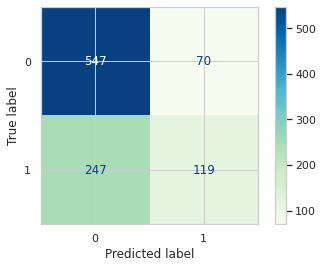

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm=confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="GnBu")
plt.show()
#test veri setindeki örneklem sayısı 938

In [ ]:
print("recall score of random forest:",recall_score(y_test,y_pred_rf))

recall score of random forest: 0.3251366120218579


In [ ]:
print("precision score of random forest:",precision_score(y_test,y_pred_rf))

precision score of random forest: 0.6296296296296297


In [ ]:
print("f1 score of random forest:",f1_score(y_test, y_pred_rf))

f1 score of random forest: 0.42882882882882883
